In [206]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [207]:
metro_parks = gpd.read_file('../geospatial-explore/data/metroparks.geojson')
print(metro_parks.crs)
metro_parks.head(10)

epsg:4326


acres                  name year_estab     common_nam status  \
0     69.86    Harpeth River Park       1988  Harpeth River   PARK   
1      9.88    Harpeth Knoll Park       1972  Harpeth Knoll   PARK   
2     17.14         Bellevue Park       1982    Red Caboose   PARK   
3    809.59       Bells Bend Park       2007     Bells Bend   PARK   
4  2168.792  Alvin G. Beaman Park       1996         Beaman   PARK   
5   1113.12     Edwin Warner Park       1937   Edwin Warner   PARK   
6      8.53       H. G. Hill Park       2012     H. G. Hill   PARK   
7   1991.56     Percy Warner Park       1926   Percy Warner   PARK   
8     25.24        Charlotte Park       1964      Charlotte   PARK   
9     18.38          Joelton Park       1989        Joelton   PARK   

                          address           lon          lat  \
0             7820 Coley Davis Rd   -86.9592214  36.07738249   
1         708 Goodpasture Terrace  -86.93815537  36.05942777   
2            656 Colice Jeanne Rd  -86.93354496  36.07159731   
3           4187 Old Hickory Blvd  -86.92646294  36.15016925   
4          5911 Old Hickory Blvd.  -86.91984207  36.26075833   
5                    50 Vaughn Rd   -86.9074396  36.05688279   
6             6710 Charlotte Pike  -86.88757407  36.13619596   
7                     7311 Hwy100  -86.88419854  36.06729215   
8                   6031 Deal Ave  -86.87070668  36.15454327   
9  21 Joelton Community Center Rd  -86.87022094  36.31718158   

                                          descriptio  \
0  Harpeth River State Park has much historical a...   
1  Huge grassy field with playground, and shade s...   
2  Bellevue Park, known as Red Caboose Park, is p...   
3  Located in western Davidson County, this park ...   
4  Beaman Park provides education and awareness p...   
5  Edwin Warner Park is a great, multi-recreation...   
6  H.G. Hill Park is a small, friendly park with ...   
7  Percy Warner Park is 2684 acres of forest and ...   
8                      A nice, family oriented park.   
9  Joelton Park is a multi-recreational park with...   

                                            geometry  
0  MULTIPOLYGON (((-86.95547 36.07930, -86.95578 ...  
1  MULTIPOLYGON (((-86.93860 36.06077, -86.93742 ...  
2  MULTIPOLYGON (((-86.93207 36.06954, -86.93283 ...  
3  MULTIPOLYGON (((-86.93987 36.16093, -86.93495 ...  
4  MULTIPOLYGON (((-86.90367 36.27352, -86.90364 ...  
5  MULTIPOLYGON (((-86.89420 36.04865, -86.89429 ...  
6  MULTIPOLYGON (((-86.88729 36.13620, -86.88735 ...  
7  MULTIPOLYGON (((-86.87147 36.07105, -86.87149 ...  
8  MULTIPOLYGON (((-86.86852 36.15547, -86.86854 ...  
9  MULTIPOLYGON (((-86.86987 36.31832, -86.86921 ...

In [208]:
metro_parks.crs = "EPSG:4326"
print(metro_parks.crs)

EPSG:4326


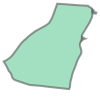

In [209]:
metro_parks.loc[7, 'geometry'] #Percy Warner

In [210]:
print(metro_parks.loc[7, 'geometry'])

MULTIPOLYGON (((-86.87146931940489 36.07105279530366, -86.87149153460857 36.07103198687317, -86.87144000068417 36.07126971434976, -86.87135726114316 36.07162414654162, -86.87135129660454 36.07165213258133, -86.87134559668085 36.07168015456246, -86.87134016246371 36.07170821067455, -86.87133499506413 36.07173630090931, -86.87133009333071 36.07176442167003, -86.87132545837467 36.07179257294884, -86.87132108905669 36.07182075205005, -86.87131698869742 36.07184895804846, -86.87131315504746 36.07187718825633, -86.87130958920697 36.07190544176441, -86.87130629115659 36.07193371677047, -86.87130326086722 36.07196201057069, -86.87130049833866 36.07199032316522, -86.87129800467184 36.07201865364478, -86.8712957809275 36.07204699749501, -86.87129382376577 36.07207535383901, -86.87129213650631 36.0721037217514, -86.87129203953144 36.07213263967784, -86.87129221566089 36.07216155743265, -86.87129266377001 36.07219047322148, -86.87129338383546 36.07221938524171, -86.87129437583931 36.07224829169135

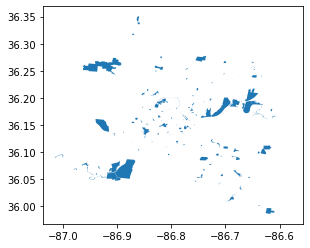

In [211]:
metro_parks.plot()

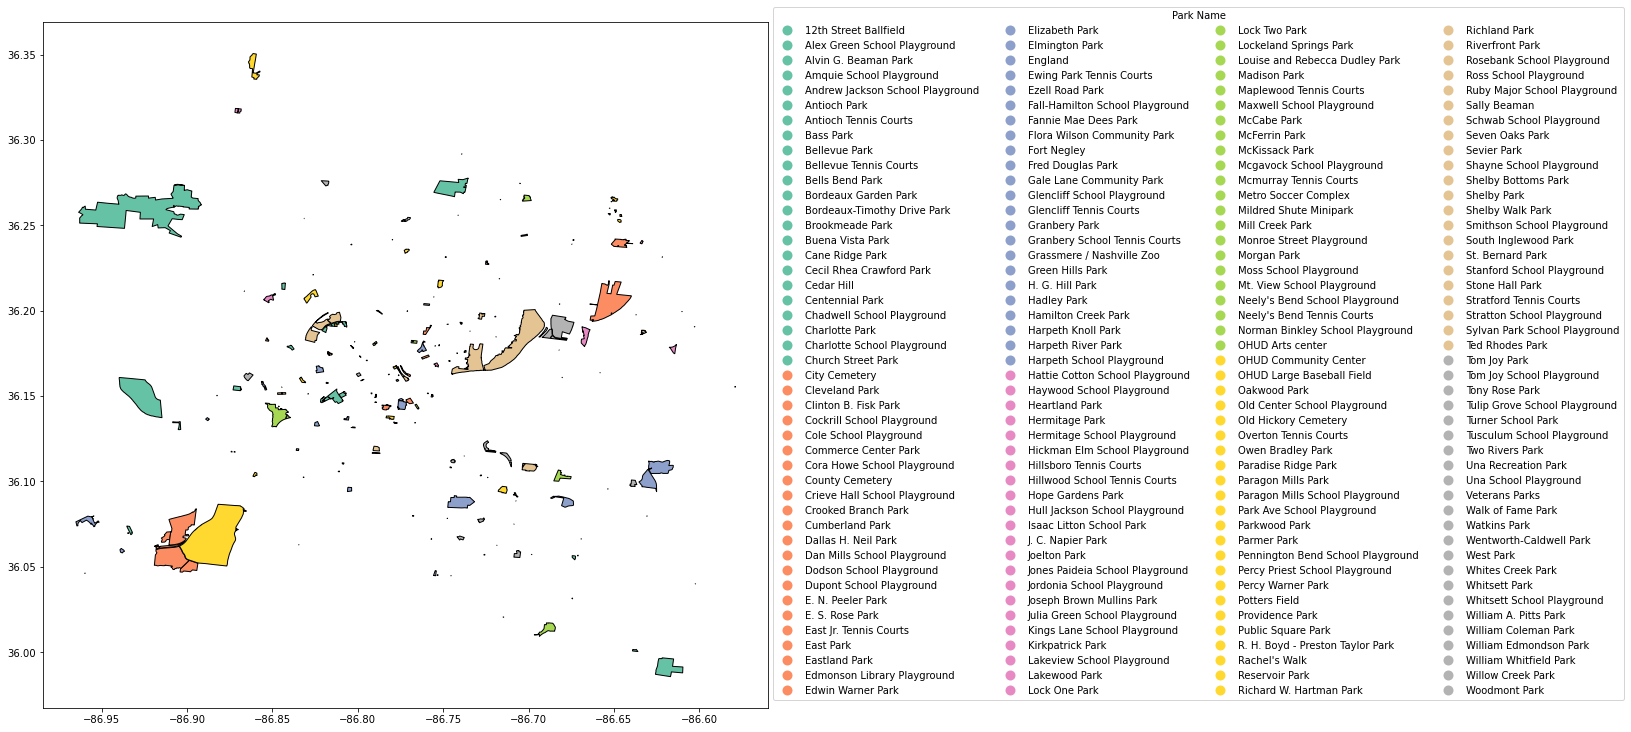

In [212]:
leg_kwds = {'title': 'Park Name', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 4}

metro_parks.plot(column = 'name', figsize=(13, 13),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

In [213]:
bike_racks = gpd.read_file('../geospatial-explore/data/bikeracks.geojson')
print(bike_racks.shape)
bike_racks.head(3)

(430, 13)


detail_loc quantity       location  \
0                              Hickory Hollow Mall        1           Mall   
1  Stones River Greenway - Donelson/Hermitage Area        2       Greenway   
2    Percy Priest Reservoir, Stones River Greenway        0  Park/Greenway   

   domain idnumber objectid    status             lon  type   data_colle  \
0  Public      113        1  Existing  -86.6554527779  Rack  Health Dept   
1  Public      114        2  Existing  -86.6340625226  Rack  Health Dept   
2  Public      256        3  Proposed  -86.6206705697  Rack  Health Dept   

             lat capacity                    geometry  
0  36.0499277778       12  POINT (-86.65545 36.04993)  
1  36.1852800378        4  POINT (-86.63406 36.18528)  
2  36.1584215986        0  POINT (-86.62067 36.15842)

In [214]:
bike_racks.dtypes

detail_loc      object
quantity        object
location        object
domain          object
idnumber        object
objectid        object
status          object
lon             object
type            object
data_colle      object
lat             object
capacity        object
geometry      geometry
dtype: object

In [215]:
pd.to_numeric(bike_racks.lon)
pd.to_numeric(bike_racks.lat)

0      36.049928
1      36.185280
2      36.158422
3      36.187547
4      36.172455
         ...    
425    36.152393
426    36.180616
427    36.126612
428    36.164314
429    36.127441
Name: lat, Length: 430, dtype: float64

In [216]:
#bike_racks['geometry2'] = bike_racks.apply(lambda x: Point((float(x.lon), 
                                                       #  float(x.lat))), 
                                     #   axis=1)
#bike_racks.head(3)

In [217]:
metro_parks.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [218]:
bike_geo = gpd.GeoDataFrame(bike_racks, 
                           crs = metro_parks.crs, 
                           geometry = bike_racks['geometry'])

In [219]:
metro_parks = metro_parks[['name', 'descriptio', 'geometry']]

In [220]:
racks_by_park = gpd.sjoin(bike_geo, metro_parks, op = 'within')

In [221]:
racks_by_park.head()

detail_loc quantity  \
1      Stones River Greenway - Donelson/Hermitage Area        2   
3    Two Rivers Golf Course, Stones River Greenway ...        1   
409                                       Wave Country        0   
4                         East Park & Community Center        3   
393                 East Park - Woodland St @ S 8th St        0   

                  location  domain idnumber objectid           status  \
1                 Greenway  Public      114        2         Existing   
3            Park/Greenway  Public      115        4         Existing   
409                   Park  Public      431      410  Future Artistic   
4    Park/Community Center  Public      103        5         Existing   
393                   Park  Public      415      394  Future Artistic   

                lon  type   data_colle            lat capacity  \
1    -86.6340625226  Rack  Health Dept  36.1852800378        4   
3    -86.6865259267  Rack  Health Dept  36.1875466948        5   
409  -86.6875304194  Rack        Civic  36.1872651777        0   
4    -86.7621800831  Rack  Health Dept  36.1724554062       15   
393  -86.7587196799  Rack        Civic  36.1740162738        0   

                       geometry  index_right             name  \
1    POINT (-86.63406 36.18528)          270             None   
3    POINT (-86.68653 36.18755)           91  Two Rivers Park   
409  POINT (-86.68753 36.18727)           91  Two Rivers Park   
4    POINT (-86.76218 36.17246)           70        East Park   
393  POINT (-86.75872 36.17402)           70        East Park   

                                            descriptio  
1                                                 None  
3    Two Rivers Park is a huge park featuring many ...  
409  Two Rivers Park is a huge park featuring many ...  
4    East Park has a great community center, playgr...  
393  East Park has a great community center, playgr...

In [222]:
racks_by_park['name'].value_counts()

McCabe Park           7
Riverfront Park       5
Buena Vista Park      5
Public Square Park    5
Hermitage Park        4
                     ..
Elmington Park        1
Lock One Park         1
E. N. Peeler Park     1
Paragon Mills Park    1
Green Hills Park      1
Name: name, Length: 63, dtype: int64

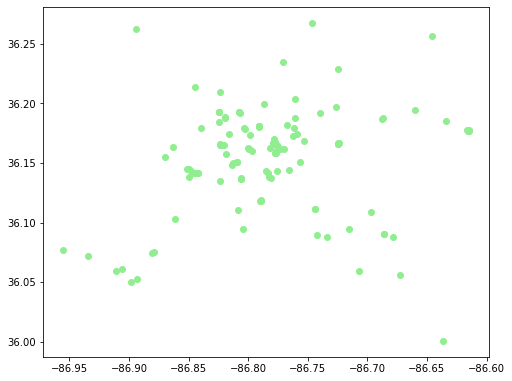

In [223]:
racks_by_park.plot(figsize=(8,10),color='lightgreen')
plt.show();

McCabe Park

In [224]:
racks_in_mccabe = racks_by_park.loc[racks_by_park['name'] == 'McCabe Park']
racks_in_mccabe.shape

(7, 16)

In [225]:
polygon_mccabe = metro_parks.loc[metro_parks['name'] == 'McCabe Park']
polygon_mccabe.shape

(1, 3)

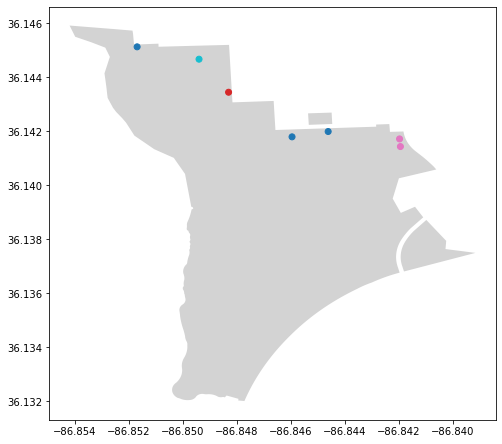

In [226]:
ax = polygon_mccabe.plot(figsize = (8, 10), color = 'lightgray')
racks_in_mccabe.plot(ax = ax, column = 'detail_loc');
plt.show();

In [227]:
polygon_mccabe.geometry.centroid

23    POINT (-86.84705 36.13922)
dtype: geometry

In [228]:
center = polygon_mccabe.geometry.centroid[23]
print(center)

POINT (-86.84704746298162 36.13921612237699)


In [229]:
# reverse the order when constructing the array for folium location
area_center = [center.y, center.x]

# check the order of area_center, the location for our folium map
print(area_center)

[36.13921612237699, -86.84704746298162]


In [230]:
map_mccabe = folium.Map(location =  area_center, zoom_start = 15)
map_mccabe

In [231]:
for row_index, row_values in racks_by_park.iterrows():
    print('index is', row_index)
    print('values are:')
    print(' ')
    print(row_values)
    print('------------------------- ')

index is 1
values are:
 
detail_loc     Stones River Greenway - Donelson/Hermitage Area
quantity                                                     2
location                                              Greenway
domain                                                  Public
idnumber                                                   114
objectid                                                     2
status                                                Existing
lon                                             -86.6340625226
type                                                      Rack
data_colle                                         Health Dept
lat                                              36.1852800378
capacity                                                     4
geometry           POINT (-86.63406252260494 36.1852800378101)
index_right                                                270
name                                                      None
descriptio                    

In [232]:
map_mccabe = folium.Map(location =  area_center, zoom_start = 15)

folium.GeoJson(polygon_mccabe).add_to(map_mccabe)

#iterate through stops_in_37207 to create locations and markers 
#for each bus stop
#remember for Folium locations, lat is listed first!!

for row_index, row_values in racks_in_mccabe.iterrows():
    loc = [row_values['lat'], row_values['lon']]
    pop = str(row_values['detail_loc'])
    marker = folium.Marker(
        location = loc, 
        popup = pop) 
    
    marker.add_to(map_mccabe)
map_mccabe.save('../geospatial-explore/maps/mapmccabe.html')

#display our map
map_mccabe

In [233]:
cluster_map_mccabe = folium.Map(location =  area_center, zoom_start = 15)

#create a marker cluster
marker_cluster = MarkerCluster().add_to(cluster_map_mccabe)

folium.GeoJson(polygon_mccabe).add_to(cluster_map_mccabe)

# inside the loop add each markwe to the cluster
for row_index, row_values in racks_in_mccabe.iterrows():
    loc = [row_values['lat'], row_values['lon']]
    pop = str(row_values['detail_loc'])
    marker = folium.Marker(
        location = loc, 
        popup = pop) 
    
    marker.add_to(marker_cluster)

    
#save an interactive HTML map by calling .save()
cluster_map_mccabe.save('../geospatial-explore/maps/clustermccabe.html')

cluster_map_mccabe  

Percy Warner Park

In [234]:
racks_in_percy = racks_by_park.loc[racks_by_park['name'] == 'Percy Warner Park']

polygon_percy = metro_parks.loc[metro_parks['name'] == 'Percy Warner Park']

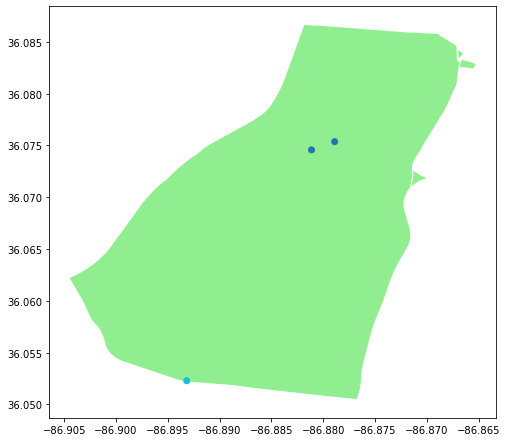

In [235]:
ax1 = polygon_percy.plot(figsize = (8, 10), color = 'lightgreen')
racks_in_percy.plot(ax = ax1, column = 'detail_loc');
plt.show();

In [236]:
polygon_percy.geometry.centroid

7    POINT (-86.88401 36.06733)
dtype: geometry

In [237]:
center2 = polygon_percy.geometry.centroid[7]
print(center2)

POINT (-86.88400885467959 36.06733156413575)


In [238]:
area_center2 = [center2.y, center2.x]
print(area_center2)

[36.06733156413575, -86.88400885467959]


In [239]:
map_percy = folium.Map(location =  area_center2, zoom_start = 14)

folium.GeoJson(polygon_percy).add_to(map_percy)

for row_index, row_values in racks_in_percy.iterrows():
    loc = [row_values['lat'], row_values['lon']]
    pop = str(row_values['detail_loc'])
    marker = folium.Marker(
        location = loc, 
        popup = pop) 
    
    marker.add_to(map_percy)
map_percy.save('../geospatial-explore/maps/mappercy.html')
map_percy

All of Metro Parks

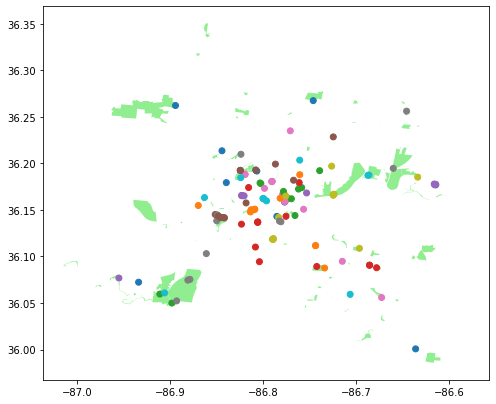

In [256]:
polygon_nashville = metro_parks
ax2=polygon_nashville.plot(figsize=(8,10),color='lightgreen')
racks_by_park.plot(ax=ax2,column='detail_loc')
plt.show();

In [260]:
map_metro_parks = folium.Map(location =  [36.1612,-86.7775], zoom_start = 11)

folium.GeoJson(polygon_nashville).add_to(map_metro_parks)

for row_index, row_values in racks_by_park.iterrows():
    loc = [row_values['lat'], row_values['lon']]
    pop = str(row_values['detail_loc'])
    marker = folium.Marker(
        location = loc, 
        popup = pop) 
    
    marker.add_to(map_metro_parks)
map_metro_parks.save('../geospatial-explore/maps/mapmetroparks.html')

map_metro_parks

In [268]:
cluster_map_nash = folium.Map(location = [36.1612,-86.7775], zoom_start = 11)

marker_cluster2 = MarkerCluster().add_to(cluster_map_nash)

folium.GeoJson(polygon_nashville).add_to(cluster_map_nash)

for row_index, row_values in racks_by_park.iterrows():
    loc = [row_values['lat'], row_values['lon']]
    pop = "Name: " +str(row_values['name']) + " - Detail Location: " + str(row_values[ 'detail_loc']) + "- Description: " + str(row_values[ 'descriptio'])
    marker = folium.Marker(
        location = loc, 
        popup = pop) 
    marker.add_to(marker_cluster2)

cluster_map_nash.save('../geospatial-explore/maps/clusternash.html')

cluster_map_nash  